In [68]:
%matplotlib inline

I will import first the libraries I believe I will be using, I will start with these and add more as I progress

In [69]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

# Import the data
There are three files I have for usage. 

*   The first, used here, is the training data file which has users with several features describing them, and a risk flag (which is either 1 (person defaulted) or 0 (person did not default)) which says whether the individual has defaulted in the past.

*   The second is the test data dataset, which includes new id's and their features but no risk default, with this data set I will predict possible defaulting individuals.



#Questions


*   How important can it be to define types here

*   Are Married/Single, House and Car Ownership categorical types

*   Is profession a string, there are multiple

*   Is risk flag an integer, values are 0 or 1, but can this be more efficient if used as a boolean

*   Is it smarter to write more info about integer types?

*   None of these seem to be ordered categorical, make sure that is correct 

* As my supervisor, can I actually ask for help in clarification or is that my responsibility, to do research and find out the answer. 

In [70]:
#ASK QUESTIONS FOR THIS ONE:
df = pd.read_csv("Training Data.csv", index_col = 0, 
                 dtype={'Income': int, 'Age': int,
                        'Experience': int, 'Married/Single': 'category',
                        'House_Ownership': 'category', 'Car_Ownership': 'category',
                        'Profession': 'string', 'CITY': 'string',
                        'STATE': 'string', 'CURRENT_JOB_YRS': int,
                        'CURRENT_JOB_YRS': int, 'CURRENT_HOUSE_YRS': int,
                        'Risk_Flag': int	
                        },
                 na_values = ['n/a', ' ', '', '-']
                 )
print('the set has {} rows and {} columns'.format(df.shape[0], df.shape[1]))

df

the set has 252000 rows and 12 columns


,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0


I am manually typing the variable data types as six of them are otherwise objects.

I am also creating some new missing values to avoid missing any when I search for them below



In [71]:
#I can use df.dtypes.value_counts() to show the frequency of each data type,
# which could be useful if I didn't label the data types manually.

# The result of df.dtypes.value_counts() is 6 int64 and 6 object types

#Describe Numericals

Using the describe() method, I can see some important details including:    

*  The risk flag mean is 0.12, meaning that **most individuals are defaulters**. Standard deviation is 0.32 however

* Income mean is quite high, and the max is so as well, but the min is extremely low (10310 Indian Rupees are 140 USD approximately) 

* Age is appropriately dispersed

* The **categorical and string variables are not displayed** (Marriage, house and car ownership,  proffesion, city and state), I will explore them with other methods  later



In [72]:
df.describe()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


#Describe Categoricals

Here I can describe the categorical variables.

Some important thigns to remember:     
* **top** is the most common value

* **freq** is the frequency of the most common value

* There are 51 different professions displayed, 317 different cities, 29 states

* I can use *df.describe(include='all')* to display all columns including numerical and categorical data types

In [73]:
categorical_info = df[['Married/Single','House_Ownership', 'Car_Ownership',
                        'Profession', 'CITY', 'STATE']].describe()

categorical_info

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


Check which variables are numerical and categorical, they are all numerical

**(Check if this is correct)** because shouldnt strings and categoricals be categorical? 

In [74]:
numerical_variables = df.columns[df.dtypes != 'object']
categorical_variables = df.columns[df.dtypes == 'object']

print(numerical_variables)
print(categorical_variables)

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')
Index([], dtype='object')


#Missing Values
Check out missing values, seem to be no NA fields not fields with missing values (isnull), 

* *Use the sort_values() function to sort columns in descending order, like this df.isna().sum().sort_values()*

* *Divide this by len(df) to get the percentage of missing values like this df.isna().sum().sort_values()/len(df)*

In [75]:
na_values = df.isna().sum()

na_values

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [76]:
isnull_values = df.isnull().sum()

isnull_values

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

#Pearson Correlation

**Ask Dr. Buchan what methods for correlation are good when**. (use corr() or something else, since Risk_Flag only has two numbers, what chart or method can I use to correlate it) 

I will start using the **corr()** method with the '**pearson**' method until I find out which methods are better (kendall maybe).

* The pearson method measures the strenght of the linear relationship between two variables, it goes from -1 to 1, -1 means negative linera correlation, 0 means there is no correlation, 1 means there is a total positive correlation (*Nettleton, D. (2014). Selection of Variables and Factor Derivation. In Commercial Data Mining Processing, analysis and modeling for Predictive Analytics Projects. essay, Elsevier. *)

* If I read categorical variables as explict categories I can use corr() to find the correlation with them and Risk_Flag



In [111]:
#Can also do one by one with print(df['Income'].corr(df['Risk_Flag'])) for example
#I can use the kendall method as welldf.corr(method ='kendall')

df['Married/Single']=df['Married/Single'].astype('category').cat.codes
df['House_Ownership']=df['House_Ownership'].astype('category').cat.codes
df['Car_Ownership']=df['Car_Ownership'].astype('category').cat.codes
df['Profession']=df['Profession'].astype('category').cat.codes
df['CITY']=df['CITY'].astype('category').cat.codes
df['STATE']=df['STATE'].astype('category').cat.codes

df['Risk_Flag']=df['Risk_Flag'].astype('category').cat.codes
df.corr(method = 'pearson')

#Other methods to use are the following:
#df.corr()
#df.corr(method = 'kendall')



,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Income,1.000000,-0.000652,0.006422,0.002682,0.016433,0.004068,0.000725,-0.001919,-0.004067,0.007045,-0.002397,-0.003091
Age,-0.000652,1.000000,-0.001118,-0.005323,-0.009820,0.009395,-0.008551,0.002104,-0.004985,0.002154,-0.020134,-0.021809
Experience,0.006422,-0.001118,1.000000,-0.001752,-0.007912,0.007519,0.000975,-0.025703,-0.001251,0.646098,0.019309,-0.034523
Married/Single,0.002682,-0.005323,-0.001752,1.000000,-0.022501,0.001206,-0.007534,0.012280,-0.009477,0.004251,-0.007539,0.021092
House_Ownership,0.016433,-0.009820,-0.007912,-0.022501,1.000000,-0.001233,0.001242,-0.014447,-0.007792,-0.009790,-0.005618,0.023622
Car_Ownership,0.004068,0.009395,0.007519,0.001206,-0.001233,1.000000,0.011887,0.001648,0.026000,0.011099,0.000251,-0.024036
Profession,0.000725,-0.008551,0.000975,-0.007534,0.001242,0.011887,1.000000,0.018852,0.001557,-0.004536,0.001954,-0.004900
CITY,-0.001919,0.002104,-0.025703,0.012280,-0.014447,0.001648,0.018852,1.000000,-0.038040,-0.027353,-0.010654,0.004575
STATE,-0.004067,-0.004985,-0.001251,-0.009477,-0.007792,0.026000,0.001557,-0.038040,1.000000,0.008745,0.007281,-0.003401
CURRENT_JOB_YRS,0.007045,0.002154,0.646098,0.004251,-0.009790,0.011099,-0.004536,-0.027353,0.008745,1.000000,0.005372,-0.016942


I still do not understand these two correlation methods so I will do some research on each. However, I can make some conclusions on looking at both methods:     

* I want to analyze the correlation between variables and Risk_Flag, so I can ignore most other correlations

* Risk_Flag and the other variables always have a negative correlation, but sometimes the number is extremely low, almost reaching 0

* **Does this mean it can be ignored, or even if the number is extremely close to 0 it must still be taken into account**

* **Does positive correlation mean there is a correlation with defaulting or not defaulting?**

I can also see it easier using the print method

The negative correlated values are:      
* Income
* Age
* Years of Experience
* Current Car Ownership
* Current Profession
* State
* Current Job Years
* Current House Years

The positive correlated values are:      
* Current Relationship Statues
* Current House Ownership
* City


In [115]:
print('The correlation between Income and Risk Flag is:', df['Income'].corr(df['Risk_Flag']))
print('The correlation between Age and Risk Flag is:', df['Age'].corr(df['Risk_Flag']))
print('The correlation between years of experience and Risk Flag is:', df['Experience'].corr(df['Risk_Flag']))
print('The correlation between Current Relationship Status and Risk Flag is:', df['Married/Single'].corr(df['Risk_Flag']))
print('The correlation between Current House Ownership and Risk Flag is:', df['House_Ownership'].corr(df['Risk_Flag']))
print('The correlation between Current Car Ownership and Risk Flag is:', df['Car_Ownership'].corr(df['Risk_Flag']))
print('The correlation between Current Profession and Risk Flag is:', df['Profession'].corr(df['Risk_Flag']))
print('The correlation between City and Risk Flag is:', df['CITY'].corr(df['Risk_Flag']))
print('The correlation between State and Risk Flag is:', df['STATE'].corr(df['Risk_Flag']))
print('The correlation between Current Job Years and Risk Flag is:', df['CURRENT_JOB_YRS'].corr(df['Risk_Flag']))
print('The correlation between Current House Years and Risk Flag is:', df['CURRENT_HOUSE_YRS'].corr(df['Risk_Flag']))


The correlation between Income and Risk Flag is: -0.0030911681222720554
The correlation between Age and Risk Flag is: -0.021809276050707163
The correlation between years of experience and Risk Flag is: -0.0345226128907168
The correlation between Current Relationship Status and Risk Flag is: 0.02109164113471852
The correlation between Current House Ownership and Risk Flag is: 0.023622409567492945
The correlation between Current Car Ownership and Risk Flag is: -0.024035618108751426
The correlation between Current Profession and Risk Flag is: -0.004899844722877818
The correlation between City and Risk Flag is: 0.004575004615335424
The correlation between State and Risk Flag is: -0.0034011359121213624
The correlation between Current Job Years and Risk Flag is: -0.016941582052124864
The correlation between Current House Years and Risk Flag is: -0.004375163077673377


#TO DO NEXT

* Find how to use groupby to have cleaner charts (see below)

* Import new features?

* Deal with overrepresentation?

* Keep researching, start training this set

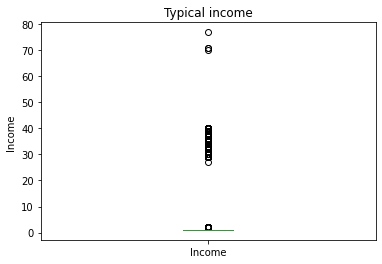

In [118]:
def plot_num_journeys_box():
    ax = df['Income'].value_counts().plot.box()
    
    ax.set_ylabel('Income ')
    ax.set_title('Typical income') 
    #raise NotImplementedError()
    # Return the Axes object for unit testing.
    return ax

num_journeys_box_ax = plot_num_journeys_box()
plt.show()